# Task 3

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**My Link:** https://github.com/bbarajas429/eds220-hwk-2


Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Acknowledgments

This exercise is based on this [NCEAS Learning Hub R lesson](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed here at KNB:

 [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886- 1997). Gulf of Alaska Data Portal. df35b.304.2.](https://knb.ecoinformatics.org/view/df35b.304.2)

The dataset is in a csv file in the homework's repo (salmon_data.csv) and has the following columns:

- Region: region code
- Year: year fish were caught
- notesRegCode: notes and comments
- Species: species of salmon caught
- Catch: commercial catches of salmon species (in tousands of fish)


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Average Salmon Catch in Regions of Alaska'}, xlabel='Region', ylabel='Mean Annual Salmon Catch (thousands of fish)'>

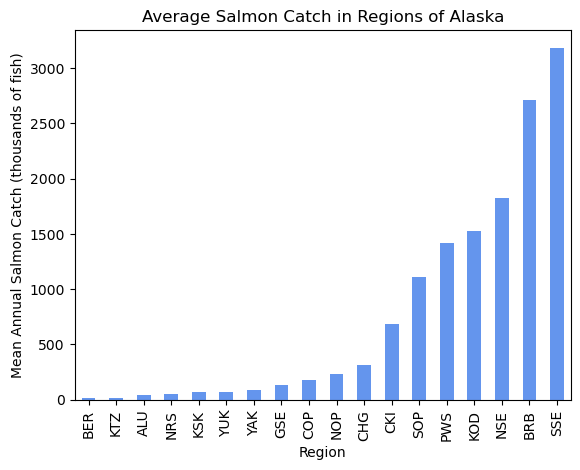

In [1]:
### ===== FINAL CODE =====

#import pandas library w/standard abbreviation
import pandas as pd

# import data from folder 
catch_original = pd.read_csv('salmon_data.csv')

# tidy data, remove notesRegCode column
catch_original.drop(columns = 'notesRegCode')

# find the row/cell where catch is an I instead of 1 
catch_original[catch_original.Catch == 'I']

# update the value of I to 1 in the one cell
catch_original.at[400, 'Catch']=1

# update dtype of catch column to be an integer
catch_original['Catch'] = catch_original.Catch.astype('int64')

# create new df with average/mean catch for each region
mean_catch = catch_original.groupby('Region').Catch.mean()

#arrange average data in ascending order
mean_catch = mean_catch.sort_values(ascending=True)

# create bar plot
mean_catch.plot(kind = 'bar', #type of plot
               title = 'Average Salmon Catch in Regions of Alaska', #plot title
               ylabel = 'Mean Annual Salmon Catch (thousands of fish)', #y-axis label
               xlabel = 'Region', #x-axis label
               color = '#6495ED') #change color of plot

## 1

Import the data from the `salmon_data.csv` as `catch_original` and look at the head of the dataframe.

In [ ]:
# import necessary libraries
import pandas as pd

In [ ]:
# import data from the hwk-2 folder
catch_original = pd.read_csv('salmon_data.csv')

# check data was imported properly
catch_original.head()

## 2
In the next cell:
1. Print the unique values (not the number of unique values) of the `notesRegCode` column. 
2. Update the dataframe so it doesn't have the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [ ]:
# View unique values of notes/comments column
print(catch_original.notesRegCode.unique())

# remove notesRegCode column
catch_original.drop(columns = 'notesRegCode')

# check that column was removed
catch_original.head(2)

## 3
In the next cell, check the data types of the columns. Does each column have the expected data type? Write your answer as a short comment in the same cell.


In [ ]:
# check the datatypes of remaining columns
catch_original.dtypes

# ANSWER: Catch is currently stored as an object instead of an integer. Depending on your goal, you
# might want to change Year to an object if you want to apply any functions to all numeric columns.

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`.

Run the next cell and read the end of the error message closely.

In [ ]:
# to use `astype` we select a specifc column
#  and then indicate the dtype we want to convert to
#  astype does not modify the column in place
catch_original.Catch.astype('int64')

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out this data set is from a PDF which was automatically converted into a csv and this value of 'I' is actually a 1.

In the next cell find the row(s) that is causing this issue. Show the filtered row(s) as the output.

In [ ]:
# find the row where catch is an I instead of 1 
catch_original[catch_original.Catch == 'I']

## 6
In the next cell:

1. Update the value of I to 1. HINT: you could use the `at` method to access a single value in the dataframe.
2. Access the row you updated to verify the value was changed.

In [ ]:
# update the value of I to 1
catch_original.at[400, 'Catch']=1

# view the column was changed
catch_original.iloc[400]

## 7
In the next cell:

1. Update the Catch column in `catch_data` to be of type `int64`.
2. Check the dtypes of the columns.

In [ ]:
# update dtype of catch column to be an integer
catch_original['Catch'] = catch_original.Catch.astype('int64')

In [ ]:
# check new column dtypes
catch_original.dtypes

## 8
Create a dataframe with the average catch per region. HINT: use `groupby()`. Store your dataframe in new variable.


In [ ]:
# create new df with average/mean catch for each region
mean_catch = catch_original.groupby('Region').Catch.mean()

#view new df
mean_catch.head()

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

In [ ]:
# no need to subset, data contains 1878-1997

#arrange data
mean_catch = mean_catch.sort_values(ascending=True)

# create bar plot
mean_catch.plot(kind = 'bar',
               title = 'Average Salmon Catch in Regions of Alaska',
               ylabel = 'Mean Annual Salmon Catch (thousands of fish)',
               xlabel = 'Region',
               color = '#6495ED')


## 10

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.